# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

### Откройте файл с данными и изучите общую информацию

Импортируем библиотеки.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

Читаем файл и изучаем его.

In [2]:
from google.colab import files
uploaded = files.upload()

Saving real_estate_data.csv to real_estate_data (2).csv


In [3]:
# Показывает все столбцы датафрейма при выводе, не скрывая их
pd.set_option('display.max_columns', None)

In [4]:
# Считываем CSV-файл
data = pd.read_csv('real_estate_data.csv', sep = '\t')

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [5]:
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest'})

Выводим всю информацию о таблице.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Строим все гистограммы.

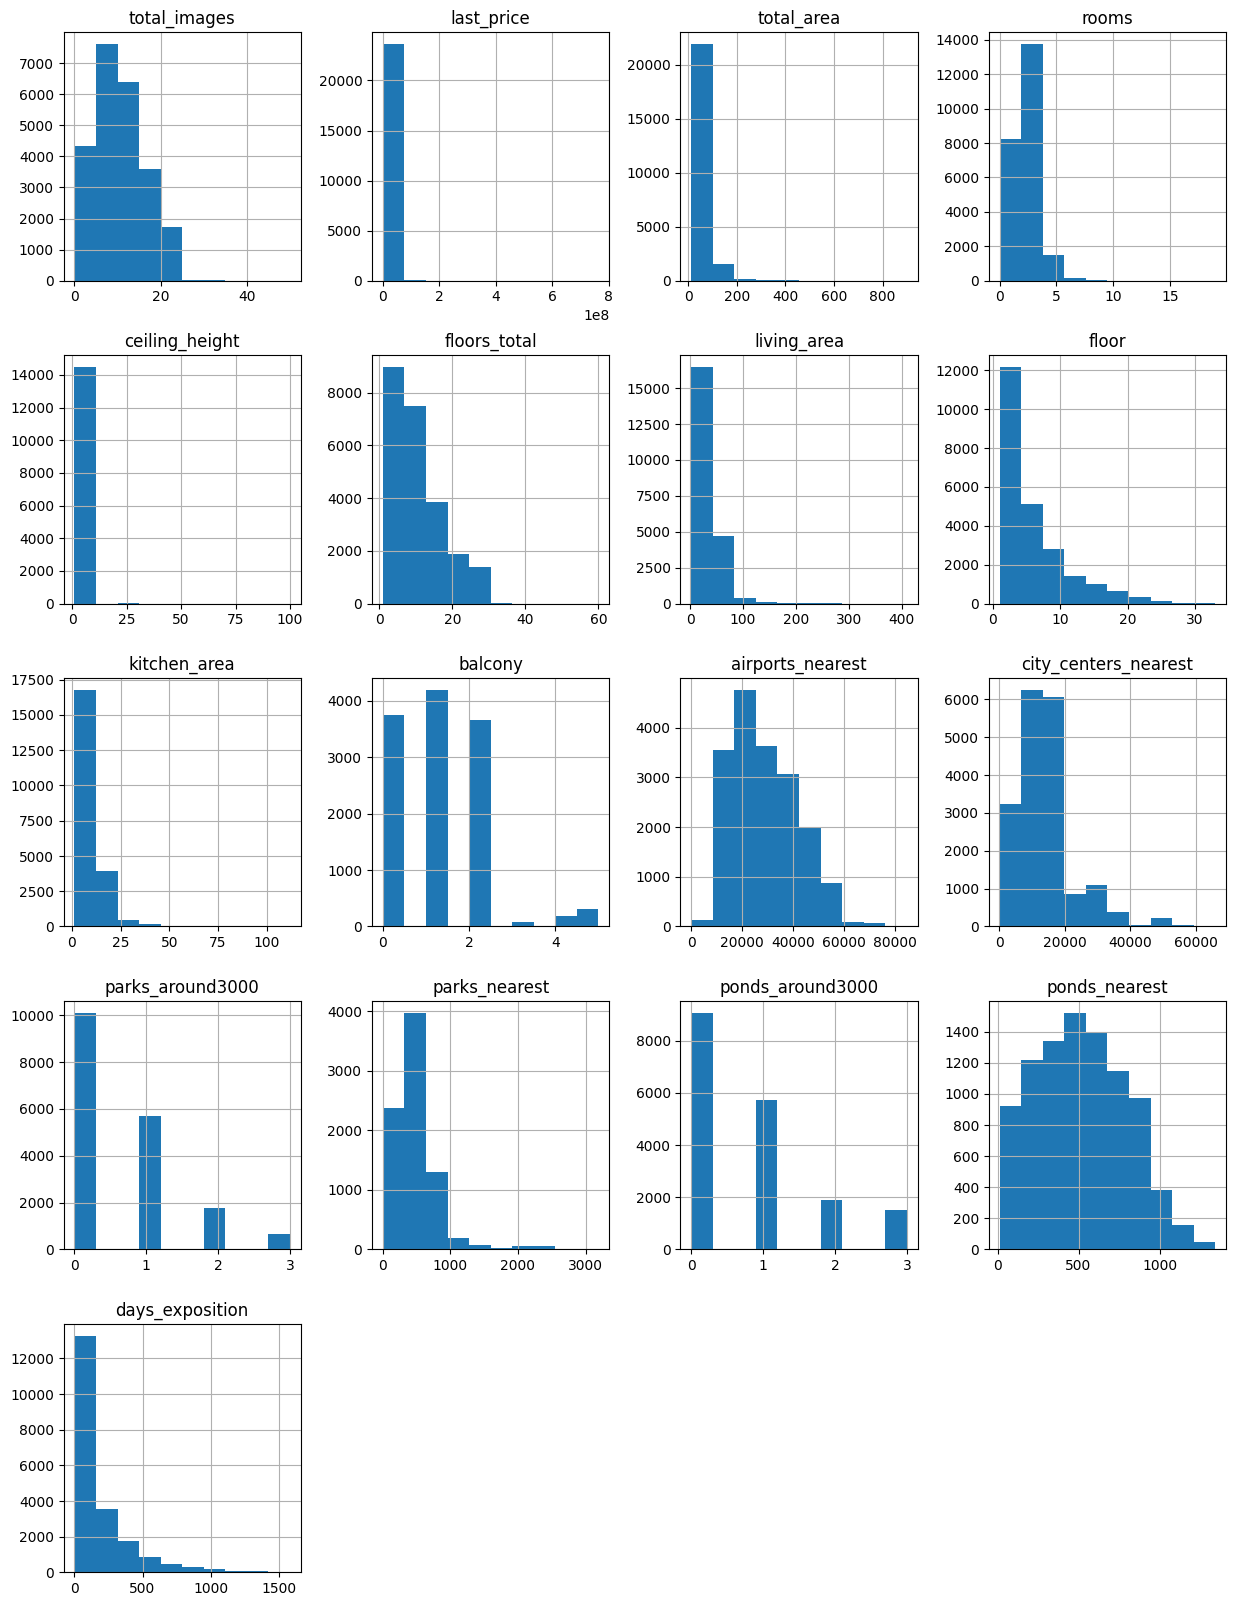

In [7]:
data.hist(figsize=(15, 20));

### Выполните предобработку данных

Смотрим колличество пропусков.

In [8]:
data.isna().sum()

,0
total_images,0
last_price,0
total_area,0
first_day_exposition,0
rooms,0
ceiling_height,9195
floors_total,86
living_area,1903
floor,0
is_apartment,20924


Заполняем пропуски в столбце balcony, kitchen_area, parks_around3000, ponds_around3000 на 0, т.к. их скорее всего просто нету, поэтому в таблице присутствуют пропуски.

In [9]:
data['balcony'] = data['balcony'].fillna(0)
data['kitchen_area'] = data['kitchen_area'].fillna(0)
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
data['is_apartment'] = data['is_apartment'].fillna(0)

In [10]:
data.isna().sum()

,0
total_images,0
last_price,0
total_area,0
first_day_exposition,0
rooms,0
ceiling_height,9195
floors_total,86
living_area,1903
floor,0
is_apartment,0


Теперь нужно избавится от других пропусков. Заменить все пропуски в ceiling_height на медианные.

In [11]:
median_ceiling_height = data['ceiling_height'].median()
data['ceiling_height'] = data['ceiling_height'].fillna(median_ceiling_height)

In [12]:
median_floors_total = data['floors_total'].median()

for index, row in data.iterrows():
    if pd.isna(row['floors_total']):
        if median_floors_total < row['floor']:
            data.at[index, 'floors_total'] = row['floor']
        else:
            data.at[index, 'floors_total'] = median_floors_total

In [13]:
# Приводим все к нижнему регистру в locality_name.
data['locality_name'] = data['locality_name'].str.lower()

In [14]:
data['locality_name'].unique()

array(['санкт-петербург', 'посёлок шушары', 'городской посёлок янино-1',
       'посёлок парголово', 'посёлок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок городского типа красный бор', 'гатчина', 'поселок мурино',
       'деревня фёдоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'посёлок металлострой',
       'посёлок городского типа лебяжье',
       'посёлок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'посёлок аннино',
       'поселок городского типа ефимовский', 'посёлок плодовое',
       'деревня заклинье', 'поселок торковичи', 'поселок первомайское',
       'красное село', 'посёлок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', '

Оставляем только название.

In [15]:
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace(['поселок ',
              'городской поселок ',
              'деревня ',
              'поселок городского типа ',
              'садовое товарищество ',
              'село ',
              'садоводческое некоммерческое товарищество ',
              'коттеджный посёлок ',
              'садовое товарищество ',
              'пансионат ',
              'посёлок при железнодорожной станции ',
              'городской ',
              'городского типа ',
              'платформа ',
              'прижелезнодорожнойстанции',
              'станции ',
              'поселок станции '
             ], '', regex=True)
)
data['locality_name'] = data['locality_name'].fillna('unkown')

In [16]:
set(data['locality_name'].unique())

{'69-й километр',
 'unkown',
 'агалатово',
 'александровская',
 'алексеевка',
 'аннино',
 'аро',
 'барышево',
 'батово',
 'бегуницы',
 'белогорка',
 'белоостров',
 'бокситогорск',
 'большая вруда',
 'большая ижора',
 'большая пустомержа',
 'большие колпаны',
 'большое рейзино',
 'большой сабск',
 'бор',
 'борисова грива',
 'бугры',
 'будогощь',
 'ваганово',
 'важины',
 'вартемяги',
 'вахнова кара',
 'вещево',
 'виллози',
 'вознесенье',
 'возрождение',
 'войсковицы',
 'войскорово',
 'володарское',
 'волосово',
 'волхов',
 'всеволожск',
 'выборг',
 'вырица',
 'выскатка',
 'высокоключевой',
 'высоцк',
 'гаврилово',
 'гарболово',
 'гатчина',
 'гладкое',
 'глажево',
 'глебычево',
 'глинка',
 'гончарово',
 'горбунки',
 'гостилицы',
 'громово',
 'дзержинского',
 'дружная горка',
 'дружноселье',
 'дубровка',
 'елизаветино',
 'ефимовский',
 'жилгородок',
 'жилпоселок',
 'житково',
 'заводской',
 'заклинье',
 'заневка',
 'запорожское',
 'зеленогорск',
 'зеленый бор',
 'зимитицы',
 'ивангород',
 

In [17]:
data['last_price'] = data['last_price'].astype('int')
data['floors_total'] = data['floors_total'].astype('int')
data['is_apartment'] = data['is_apartment'].astype('bool')
data['balcony'] = data['balcony'].astype('int')
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2,шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159.0,2015-07-24,3,2.65,14,NaN,9,False,False,False,0.0,0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Вывод: Были удалены и заменены пропуски там, где это получилось сделать логически. В столбцах balcony, kitchen_area, is_apartment все пропуски были заменены на 0. Т.к. логически можно предположить, что пропуск означанет отсутствие. parks_around3000, ponds_around3000 тоже были заменены на 0, т.к. пропуск означает, что вблизи 3км нету обьектов. Пропуски в ceiling_height были заменены на медеанные. floors_total тоже были пропуски заменены на медианные, но если этаж здания был больше чем медианное значение, то ставился этаж. locality_name были удаленые все адресные атрибуты. Все названия приведены к нижнему регистру.

ТИПЫ ДАННЫХ Вывод: last_price, floors_total, balcony привели к целочисленому значению int. is_apartment привели к булевому значению. first_day_exposition привели к формату даты.

### Добавьте в таблицу новые столбцы

In [18]:
# Цена одного квадратного метра
data['price_meter'] = (data['last_price']/data['total_area'])

# День публикации объявления (0 - понедельник, 1 - вторник и т. д.)
data['day_publication'] = data['first_day_exposition'].dt.dayofweek

# Месяц публикации объявления
data['month_publication'] = data['first_day_exposition'].dt.month

# Год публикации объявления
data['year_publication'] = data['first_day_exposition'].dt.year

# Тип этажа квартиры (значения — «первый», «последний», «другой»)
def categorize_floor (row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    return 'другой'
data['type_floor'] = data.apply(categorize_floor, axis=1)

# Расстояние до центра города в километрах
data['distance_center'] = (data['city_centers_nearest']/1000).round(0)

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_meter,day_publication,month_publication,year_publication,type_floor,distance_center
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,другой,16.0
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2,шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,1,12,2018,первый,19.0
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,другой,14.0
3,0,64900000,159.0,2015-07-24,3,2.65,14,NaN,9,False,False,False,0.0,0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,другой,7.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,другой,8.0


### Проведите исследовательский анализ данных

Общая площадь

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64


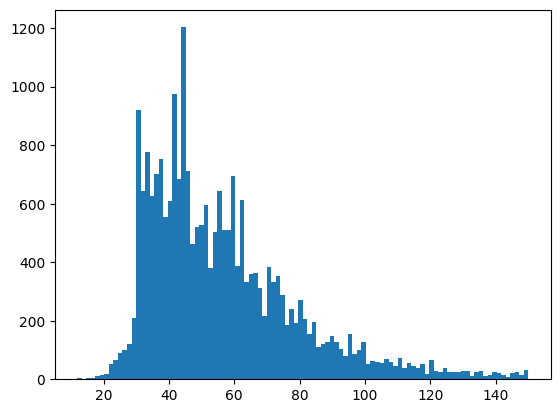

In [19]:
print(data['total_area'].describe())

plt.hist(data['total_area'], bins=100, range=(12,150))
plt.show()

Больше всего предложений от 30 до 60 квадратных метров.

Жилая площадь

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64


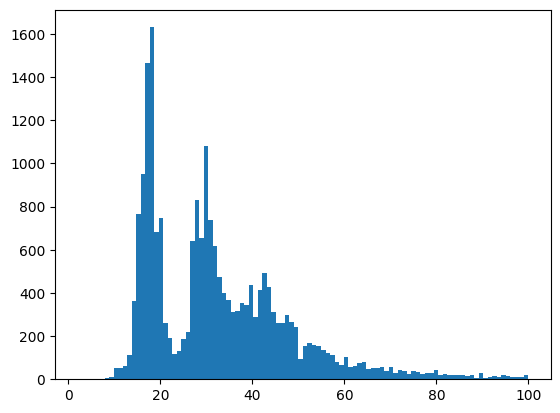

In [20]:
print(data['living_area'].describe())

plt.hist(data['living_area'], bins=100, range=(2,100))
plt.show()

Больше квартир с жилой площадью продают с 15-20кв.м и 25-35кв.м.

Площадь кухни

count    23699.000000
mean         9.553814
std          6.420973
min          0.000000
25%          6.300000
50%          9.000000
75%         11.440000
max        112.000000
Name: kitchen_area, dtype: float64


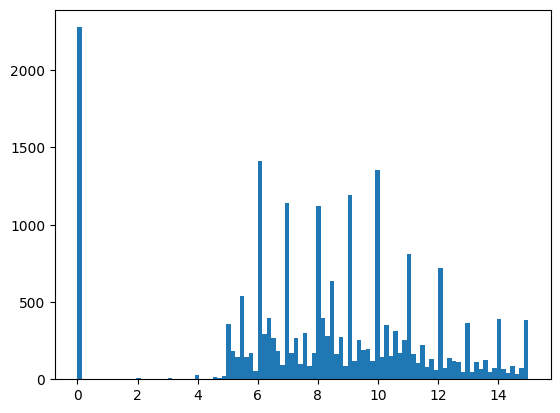

In [21]:
print(data['kitchen_area'].describe())

plt.hist(data['kitchen_area'], bins=100, range=(0,15))
plt.show()

Больше квартир с пллощадью кухни 6 кв.м, 10, 9.

Цена объекта

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64


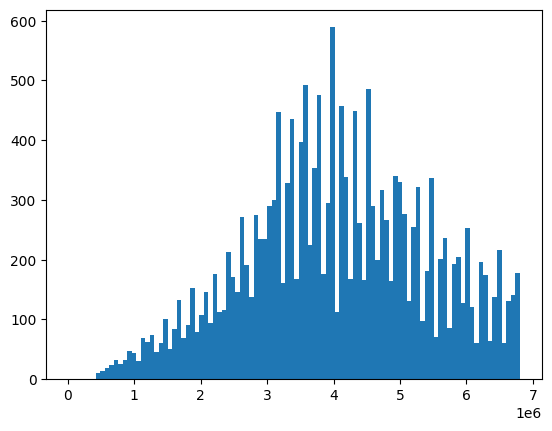

In [22]:
print(data['last_price'].describe())

plt.hist(data['last_price'], bins=100, range=(1.219000e+04,6.800000e+06))
plt.show()

Самая частая цена около 4 млн.р.

Количество комнат

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


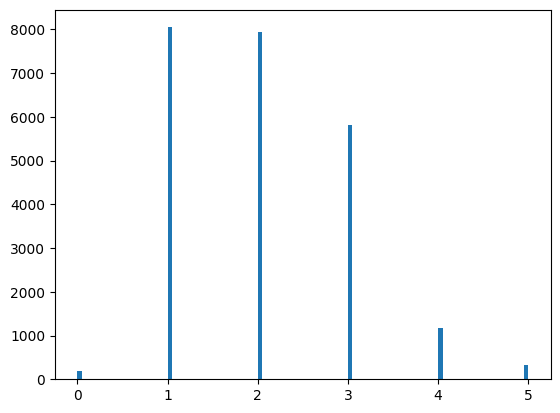

In [23]:
print(data['rooms'].describe())

plt.hist(data['rooms'], bins=100, range=(0,5))
plt.show()

Больше всего 1 и 2 комнатных квартир.

Высота потолков

count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64


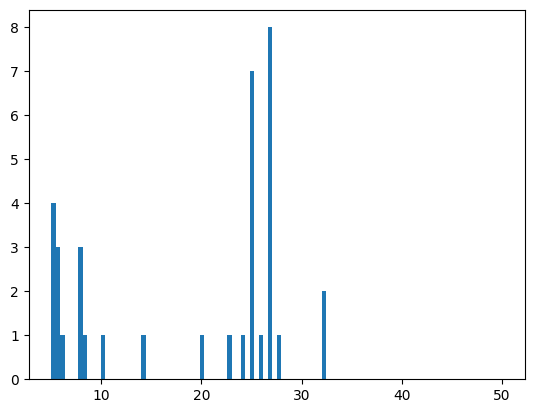

In [24]:
print(data['ceiling_height'].describe())

plt.hist(data['ceiling_height'], bins=100, range=(5,50))
plt.show()

Мало вероятно, что высота потолков может достигать 10 метров. Скорее всего не поставили разделитель. Исправим вбросы.

count    23699.000000
mean         2.697798
std          0.237643
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         10.000000
Name: ceiling_height, dtype: float64


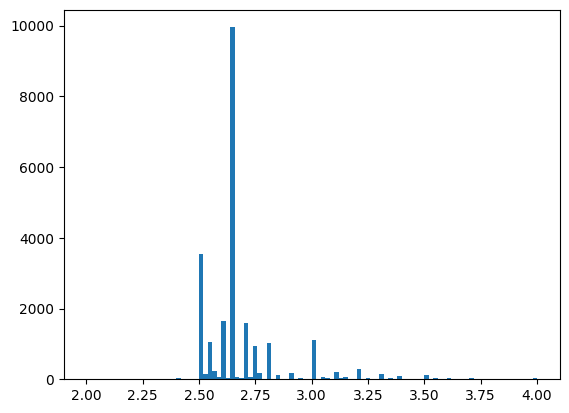

In [25]:
data.loc[data['ceiling_height'] >= 10, 'ceiling_height'] = data['ceiling_height']/10

print(data['ceiling_height'].describe())

plt.hist(data['ceiling_height'], bins=100, range=(2,4))
plt.show()

Больше предложений с высотой потолка 2.5, 2.6м.

Тип этажа квартиры («первый», «последний», «другой»)

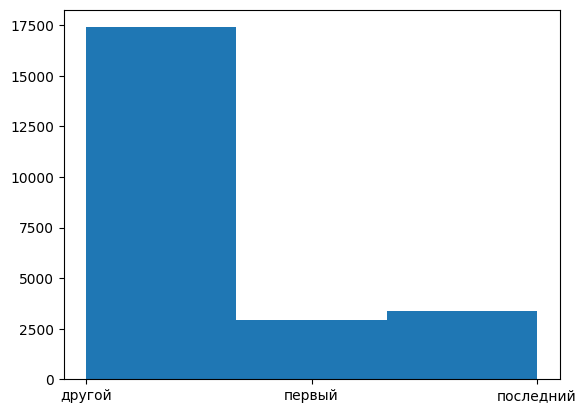

In [26]:
plt.hist(data['type_floor'], bins=3, range=(0,2))
plt.show()

Первый и последний этаж в сумме это меньше половины от общего обьема.

Общее количество этажей в доме

count    23699.000000
mean        10.678678
std          6.591239
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64


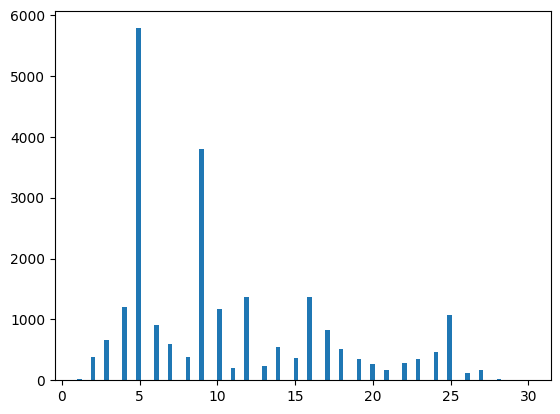

In [27]:
print(data['floors_total'].describe())

plt.hist(data['floors_total'], bins=100, range=(1,30))
plt.show()

Больше обьявлений в 5 и 9 этажных домах.

Расстояние до центра города в метрах

count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64


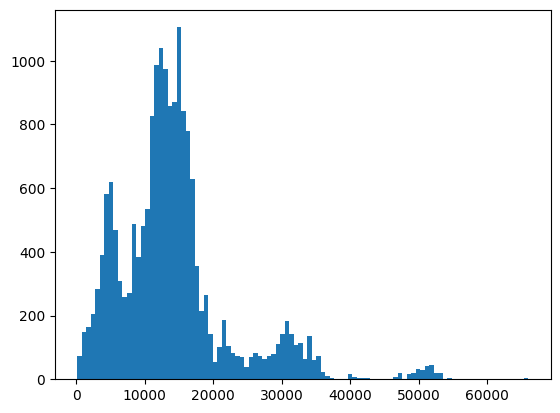

In [28]:
print(data['city_centers_nearest'].describe())

plt.hist(data['city_centers_nearest'], bins=100, range=(181.000000,65968.000000))
plt.show()

Больше предложений на расстоянии 15км и 5км.

Расстояние до ближайшего парка

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64


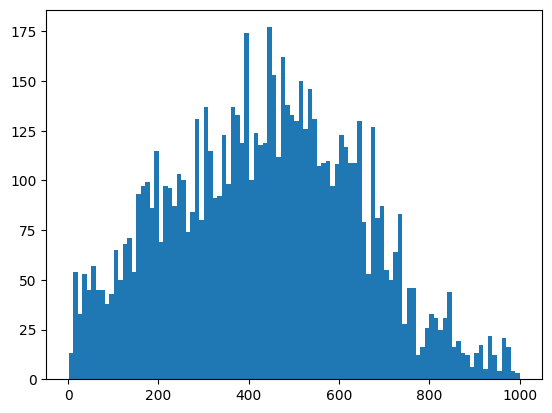

In [29]:
print(data['parks_nearest'].describe())

plt.hist(data['parks_nearest'], bins=100, range=(1,1000))
plt.show()

Больше предложений 500м от парка.

«Изучите, как быстро продавались квартиры (столбец days_exposition)»: - построена гистограмма; - рассчитаны среднее и медиана; - описано, сколько обычно занимает продажа и указано, какие продажи можно считать быстрыми, а какие — необычно долгими.

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64


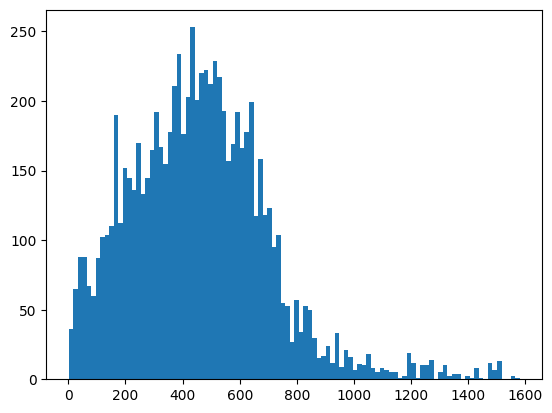

In [30]:
print(data['days_exposition'].describe())

plt.hist(data['parks_nearest'], bins=100, range=(1,1580))
plt.show()

In [31]:
data['days_exposition'].median()

95.0

Вывод: Среднее значение 180 дней, медианное 95 дней. Быстрые продажи в первый квартал. Необычно долгие продажи свыше 2 лет.

«Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта». Построены графики, которые показывают зависимость цены от параметров: - общая площадь; - жилая площадь; - площадь кухни; - количество комнат; - тип этажа, на котором расположена квартира (первый, последний, другой); - дата размещения (день недели, месяц, год).

In [32]:
mapping = {
    'первый':1,
    'другой':2,
    'последний':3
}
data['type_floor_namber'] = data['type_floor'].map(mapping)

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_meter,day_publication,month_publication,year_publication,type_floor,distance_center,type_floor_namber
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,другой,16.0,2
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2,шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,1,12,2018,первый,19.0,1
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,другой,14.0,2
3,0,64900000,159.0,2015-07-24,3,2.65,14,NaN,9,False,False,False,0.0,0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,другой,7.0,2
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,другой,8.0,2


In [33]:
correlation = data[['last_price','total_area','living_area','kitchen_area','rooms']].corr()
correlation['last_price']

,last_price
last_price,1.000000
total_area,0.653675
living_area,0.566492
kitchen_area,0.386444
rooms,0.363343


Наблюдается хорошая зависимость между ценой и общей, жилой площадью.

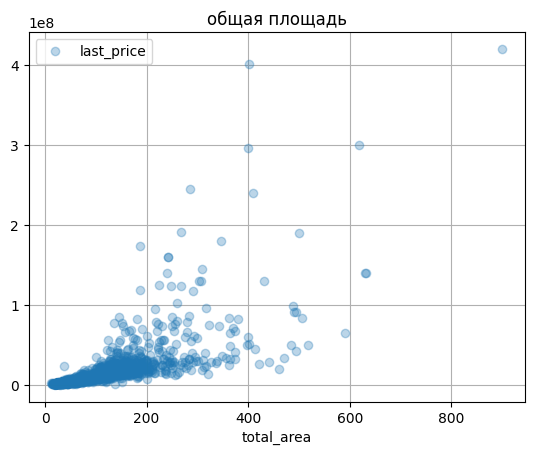

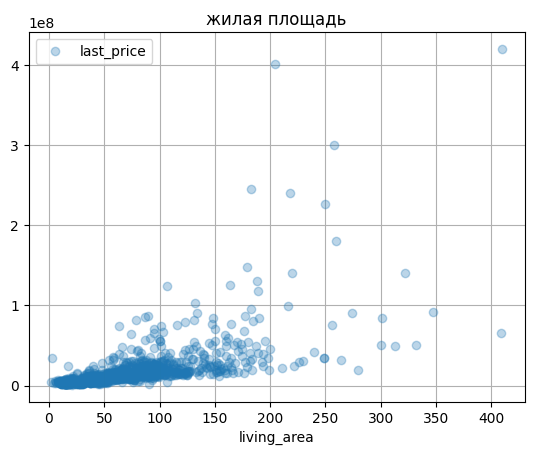

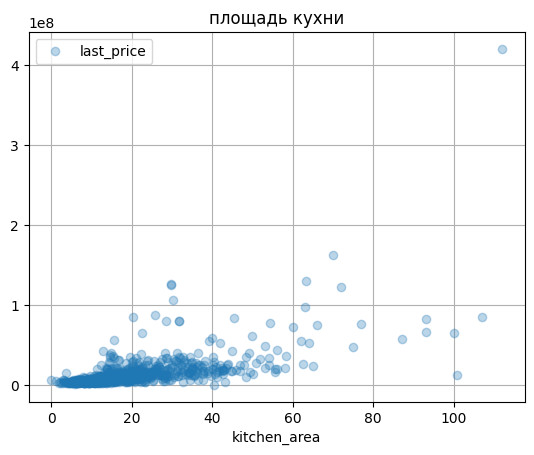

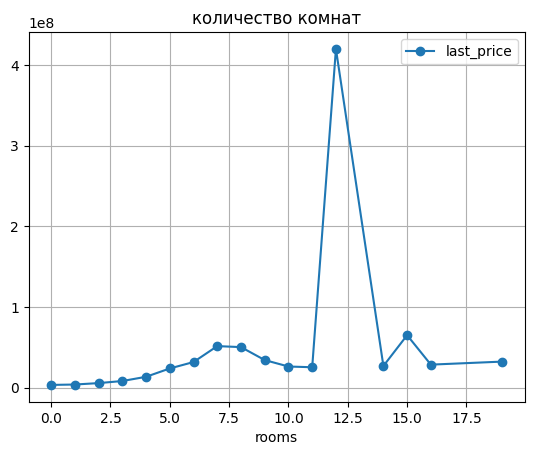

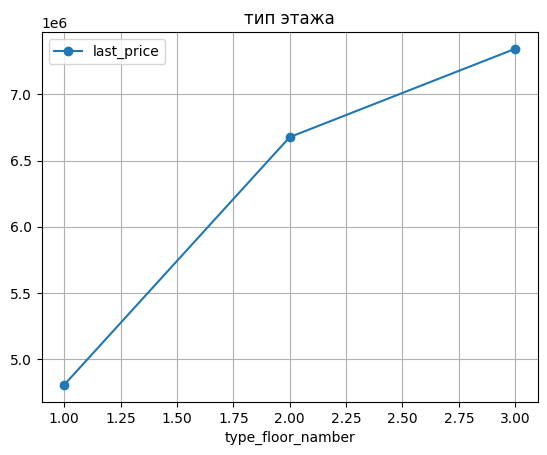

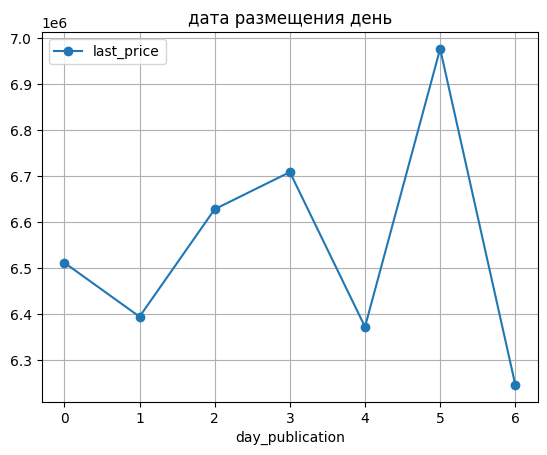

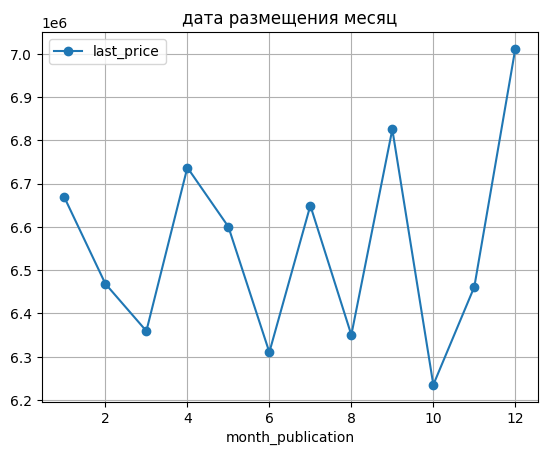

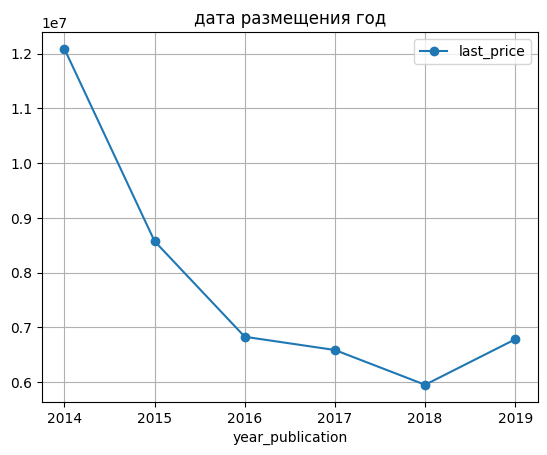

In [34]:
(
    data.pivot_table(index='total_area', values='last_price')
    .plot(grid=True, style='o', alpha=0.3)
)
plt.title('общая площадь')
plt.show()

(
    data.pivot_table(index='living_area', values='last_price')
    .plot(grid=True, style='o', alpha=0.3)
)
plt.title('жилая площадь')
plt.show()

(
    data.pivot_table(index='kitchen_area', values='last_price')
    .plot(grid=True, style='o', alpha=0.3)
)
plt.title('площадь кухни')
plt.show()

(
    data.pivot_table(index='rooms', values='last_price')
    .plot(grid=True, style='o-')
)
plt.title('количество комнат')
plt.show()

(
    data.pivot_table(index='type_floor_namber', values='last_price')
    .plot(grid=True, style='o-')
)
plt.title('тип этажа')
plt.show()

(
    data.pivot_table(index='day_publication', values='last_price')
    .plot(grid=True, style='o-')
)
plt.title('дата размещения день')
plt.show()

(
    data.pivot_table(index='month_publication', values='last_price')
    .plot(grid=True, style='o-')
)
plt.title('дата размещения месяц')
plt.show()

(
    data.pivot_table(index='year_publication', values='last_price')
    .plot(grid=True, style='o-')
)
plt.title('дата размещения год')
plt.show()

In [35]:
# Избавимся от выбросов
def remove_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
for column in ['last_price','total_area','living_area','kitchen_area','rooms']:
    data = remove_iqr(data, column)

Новые графики без выбросов

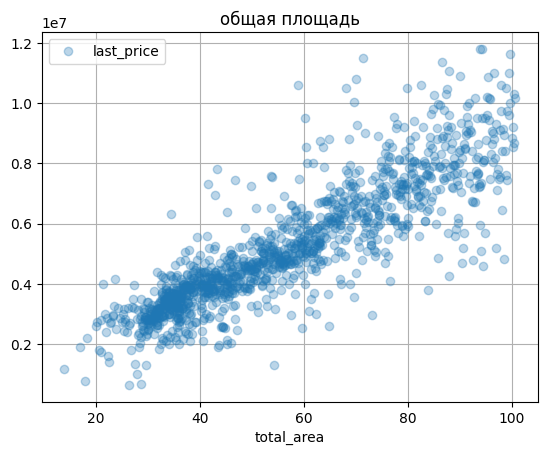

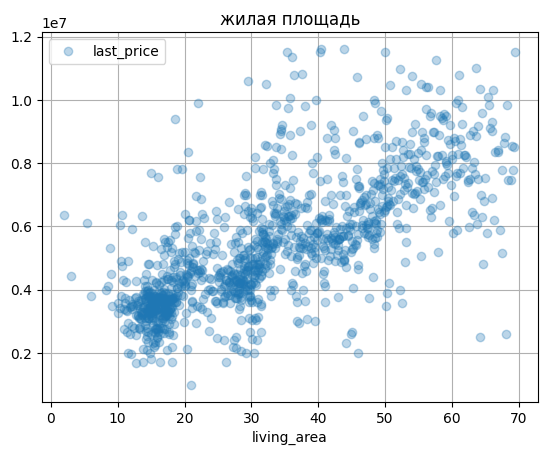

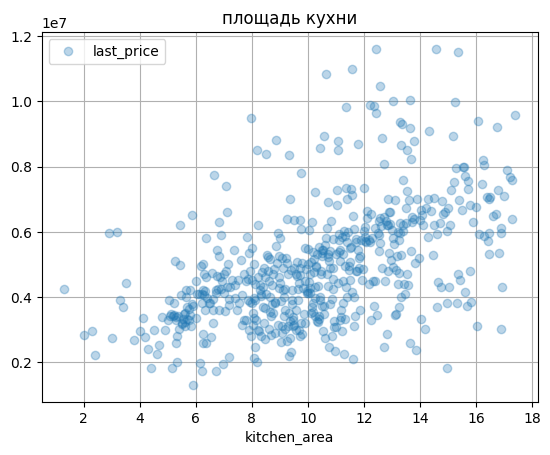

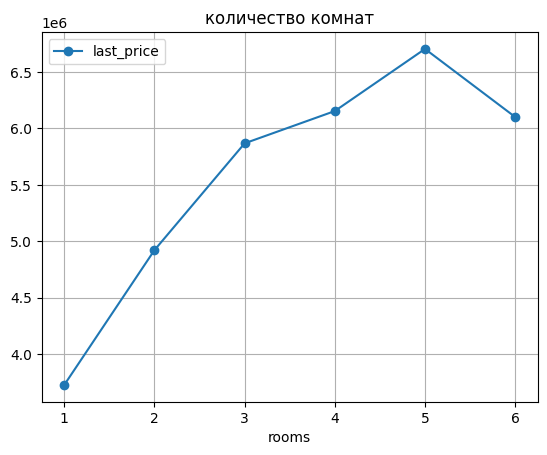

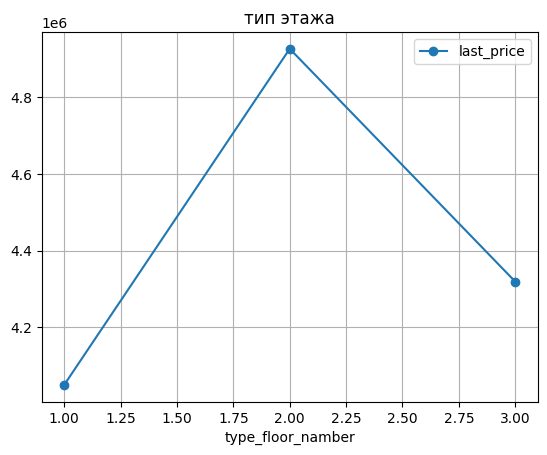

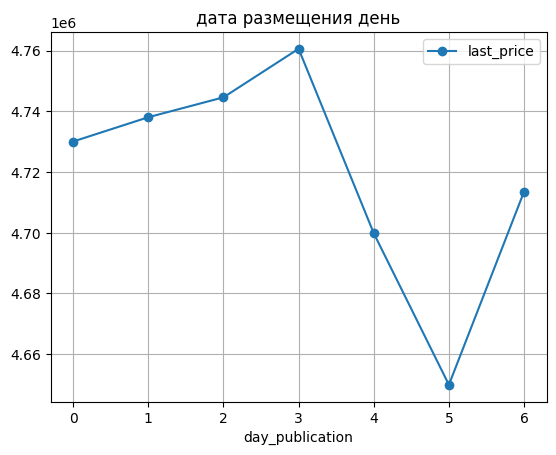

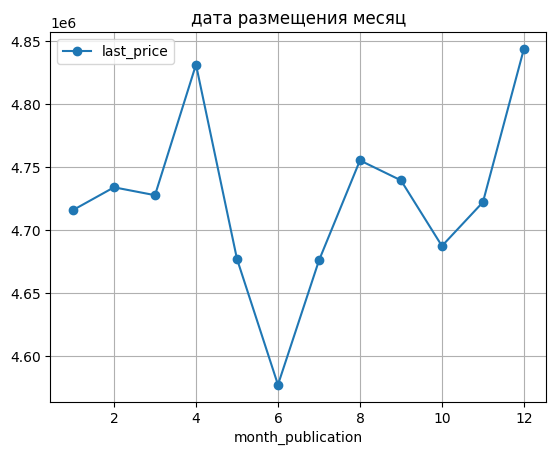

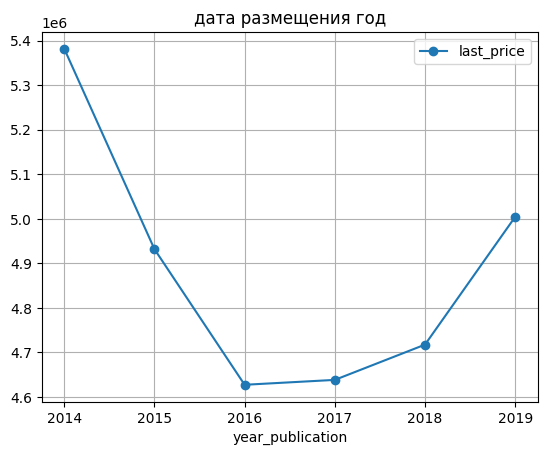

In [36]:
(
    data.pivot_table(index='total_area', values='last_price')
    .plot(grid=True, style='o', alpha=0.3)
)
plt.title('общая площадь')
plt.show()

(
    data.pivot_table(index='living_area', values='last_price')
    .plot(grid=True, style='o', alpha=0.3)
)
plt.title('жилая площадь')
plt.show()

(
    data.pivot_table(index='kitchen_area', values='last_price')
    .plot(grid=True, style='o', alpha=0.3)
)
plt.title('площадь кухни')
plt.show()

(
    data.pivot_table(index='rooms', values='last_price')
    .plot(grid=True, style='o-')
)
plt.title('количество комнат')
plt.show()

(
    data.pivot_table(index='type_floor_namber', values='last_price')
    .plot(grid=True, style='o-')
)
plt.title('тип этажа')
plt.show()

(
    data.pivot_table(index='day_publication', values='last_price')
    .plot(grid=True, style='o-')
)
plt.title('дата размещения день')
plt.show()

(
    data.pivot_table(index='month_publication', values='last_price')
    .plot(grid=True, style='o-')
)
plt.title('дата размещения месяц')
plt.show()

(
    data.pivot_table(index='year_publication', values='last_price')
    .plot(grid=True, style='o-')
)
plt.title('дата размещения год')
plt.show()

Чем выше общая и жилая площадь, тем выше стоимость жилья, еще влияет колличество комнат, чем больше, тем дороже. Первый этаж дешевле, чем остальные.

«Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений»: - выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра.

In [37]:
top_10 = data.pivot_table(index='locality_name', values='last_price', aggfunc='count')
top_10 = top_10.sort_values(by='last_price', ascending=False).head(10)
top_10['price_meter'] = data.pivot_table(index='locality_name', values='price_meter')
top_10.columns = ['count', 'average_price_meter']
top_10 = top_10.sort_values(by='average_price_meter', ascending=False)
top_10

,count,average_price_meter
locality_name,,
санкт-петербург,11610,105062.793002
пушкин,291,100149.831797
кудрово,344,95700.384903
парголово,275,91376.508348
мурино,440,86050.432760
петергоф,180,82786.552410
шушары,383,78555.991567
колпино,310,75054.104273
гатчина,280,68434.760860


Вывод: Самая высокая стоимость квадратного метра в Санкт-Петербурге, самая низнкая - Всеволожск.

Выполнено задание «Выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите их среднюю стоимость на разном удалении от центра»: - учтён каждый километр расстояния, известны средние цены квартир в одном километре от центра, в двух и так далее; - описано, как стоимость объекта зависит от расстояния до центра города; - построен график изменения средней цены для каждого километра от центра Петербурга.

In [38]:
data.query('locality_name == "санкт-петербург"')['distance_center'].describe()

,distance_center
count,11583.000000
mean,12.368212
std,4.390994
min,0.000000
25%,10.000000
50%,13.000000
75%,15.000000
max,29.000000


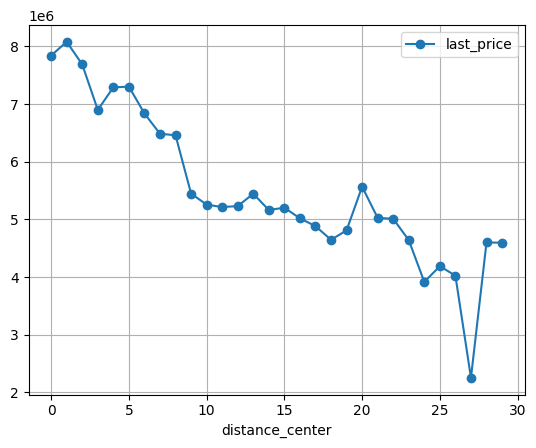

In [39]:
(
    data.query('locality_name == "санкт-петербург"')
    .pivot_table(index='distance_center', values='last_price')
    .plot(grid=True, style='o-')
)
plt.show()

Вывод: Самые дорогие квартиры в приделах 3км, после 7км, расстояние уже не так сильно влияет на цену.

### Напишите общий вывод

Открыт и изучен файл real_estate_data.csv.
Построены гистограммы по каждому столбцу.
Были удалены и заменены пропуски там, где это получилось сделать логически. В столбцах balcony, kitchen_area, is_apartment все пропуски были заменены на 0.
Т.к. логически можно предположить, что пропуск означанет отсутствие. parks_around3000, ponds_around3000 тоже были заменены на 0, т.к. пропуск означает, что вблизи 3км нету обьектов.
Пропуски в ceiling_height были заменены на медеанные, выбросы были обработаны. floors_total тоже были пропуски заменены на медианные, но если этаж здания был больше чем медианное значение, то ставился этаж.
locality_name были удаленые все адресные атрибуты.
Все названия приведены к нижнему регистру. Почти все пропуски были вызваны человеческим фактором.